In [5]:
import pandas as pd

# Load the dataset
file_path = "/content/Covid.xlsx"
  # Change this to your actual path
df = pd.read_excel(file_path)

# Preview the data
print(df.head())

# Check basic information
print(df.info())


  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), obje

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64


In [7]:
# Summary statistics
print(df.describe())


                HDI            TC            TD           STI           POP  \
count  44216.000000  50418.000000  50418.000000  50418.000000  50418.000000   
mean       0.720139      6.762125      3.413681      3.178897     15.442097   
std        0.160902      3.637347      3.082761      1.673451      2.495039   
min        0.000000      0.000000      0.000000      0.000000      6.695799   
25%        0.601000      4.158883      0.000000      2.867331     14.151619   
50%        0.752000      7.092574      3.178054      4.000583     15.929201   
75%        0.847000      9.504669      5.620401      4.335852     17.187513   
max        0.953000     15.914092     12.299900      4.605170     21.087439   

             GDPCAP  
count  50418.000000  
mean       8.318580  
std        3.177130  
min        0.000000  
25%        7.955479  
50%        9.368531  
75%       10.237704  
max       11.669379  


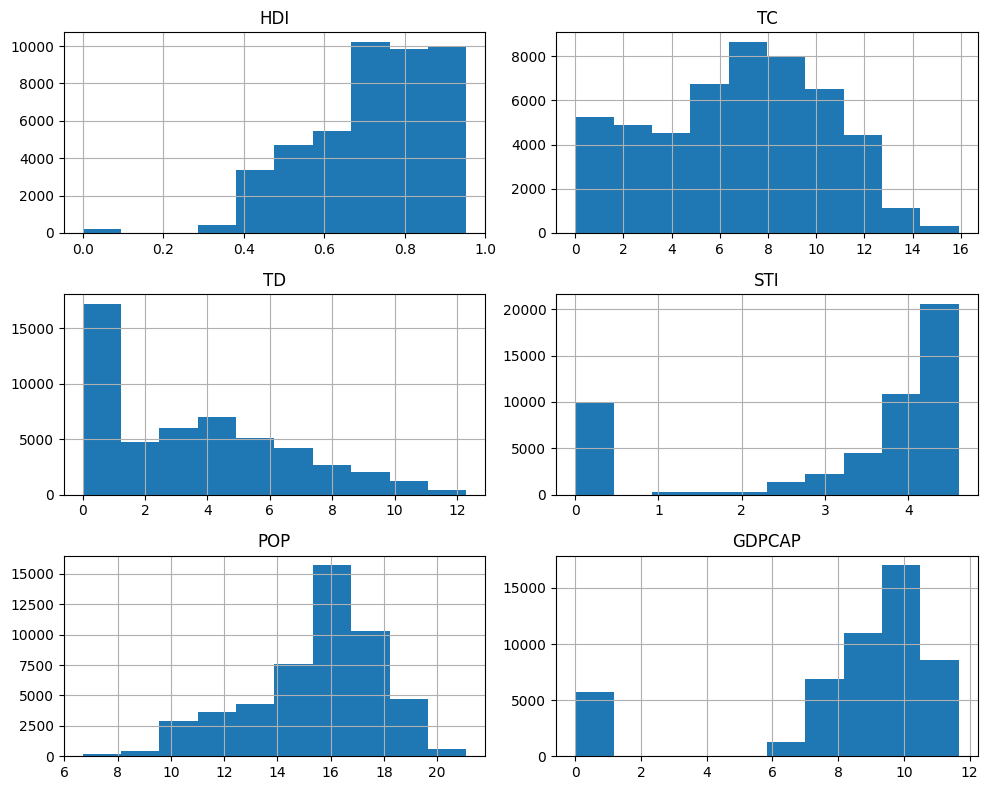

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [9]:
print(df.columns)  # Check all column names

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


In [10]:
import plotly.express as px

# Sort the dataset by HDI in descending order (optional)
df_sorted = df.sort_values(by='HDI', ascending=False)

# Create an interactive bar plot using Plotly, coloring bars by HDI
fig = px.bar(df_sorted,
             x='COUNTRY',
             y='HDI',
             title='Countries and their Human Development Index',
             labels={'COUNTRY':'Country', 'HDI':'Human Development Index'},
             hover_data=['HDI'],
             template='plotly_white',
             color='HDI',  # Add color based on HDI values
             color_continuous_scale='Bluered')  # Choose a color scale

# Rotate the x-axis labels for readability
fig.update_layout(xaxis_title='Country',
                  yaxis_title='Human Development Index',
                  xaxis_tickangle=-45)

# Show the interactive plot
fig.show()


In [11]:
# Check the data types of the columns
print(df.dtypes)

# Check for non-numeric values in numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


CODE        object
COUNTRY     object
DATE        object
HDI        float64
TC         float64
TD         float64
STI        float64
POP        float64
GDPCAP     float64
dtype: object
Non-numeric columns: Index(['CODE', 'COUNTRY', 'DATE'], dtype='object')


In [12]:
# Drop non-numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['number'])


In [13]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()



Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


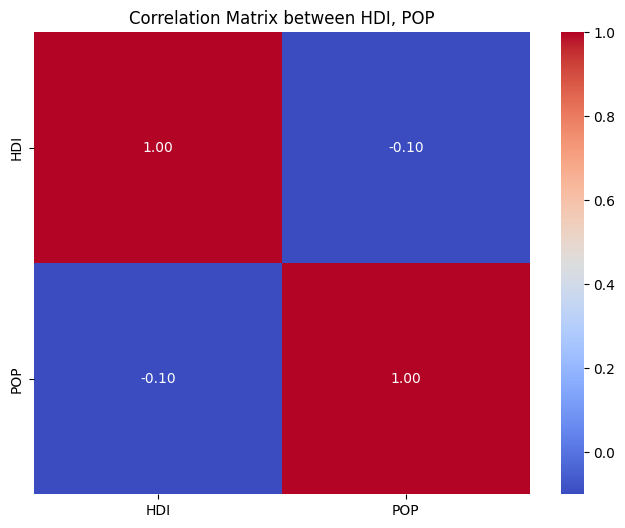

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(df.columns)

# Ensure 'HDI' is a numeric column; convert if necessary
if 'HDI' in df.columns:
    df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')  # Convert HDI to numeric, coerce errors to NaN

# Optionally, drop rows with NaN values in 'HDI' or any other numerical columns of interest
df = df.dropna(subset=['HDI', 'POP'])  # Ensure that relevant columns are not NaN

# Create a correlation matrix for HDI and other numerical columns
correlation_matrix = df[['HDI', 'POP']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between HDI, POP')
plt.show()


Top 10 Countries by Population:
           COUNTRY          POP
41           China  6199.707136
90           India  6187.333639
200  United States  5767.585258
91       Indonesia  5711.508171
145       Pakistan  5648.676670
27          Brazil  5637.371231
141        Nigeria  5628.354847
157         Russia  5526.808443
125         Mexico  5490.391650
99           Japan  5484.736623


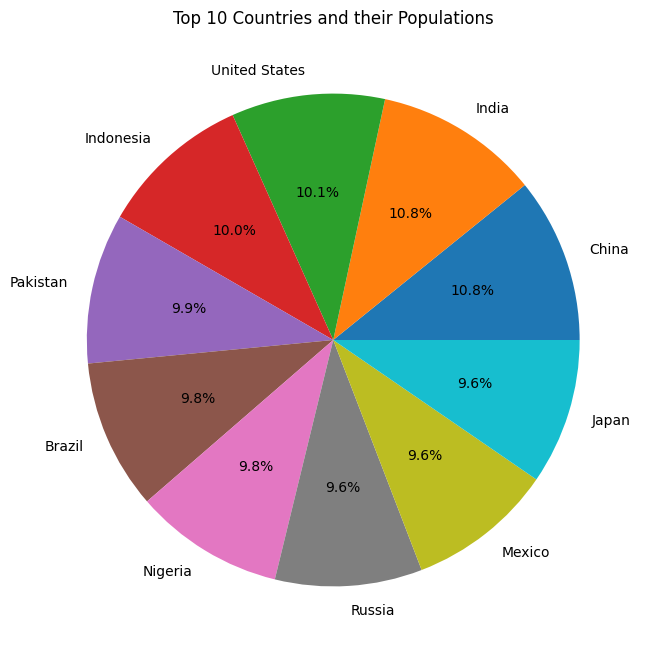

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_excel(r"/content/Covid.xlsx")  # Load your dataset

# Ensure 'COUNTRY' and 'POP' columns exist in your DataFrame
if 'COUNTRY' in df.columns and 'POP' in df.columns:
    # Group by 'COUNTRY' and sum the 'POP' to ensure all countries are unique
    country_population = df.groupby('COUNTRY')['POP'].sum().reset_index()

    # Get the top 10 countries based on population
    top_10_countries = country_population.nlargest(10, 'POP')

    # Print the top 10 countries with their populations
    print("Top 10 Countries by Population:")
    print(top_10_countries)

    # Create a pie chart for populations of the top 10 countries
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_countries['POP'], labels=top_10_countries['COUNTRY'], autopct='%1.1f%%')
    plt.title('Top 10 Countries and their Populations')
    plt.ylabel('')  # Hide the y-label for better aesthetics
    plt.show()
else:
    print("Columns 'COUNTRY' or 'POP' not found in the DataFrame.")


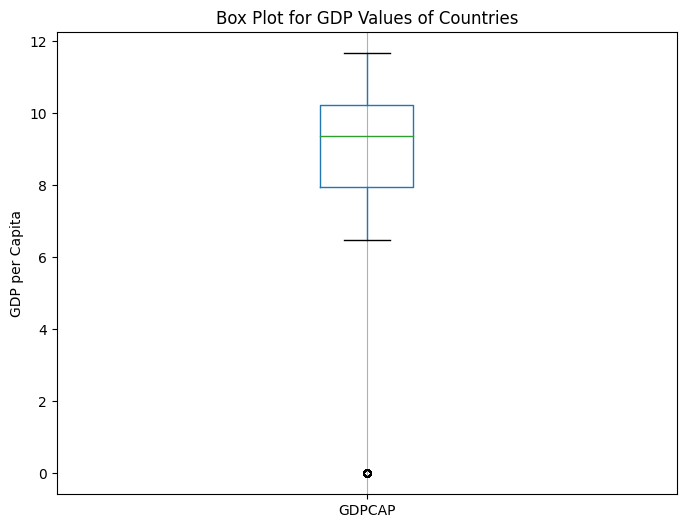

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_excel(r"/content/Covid.xlsx")  # Load your dataset

# Ensure 'GDPCAP' column exists in your DataFrame
if 'GDPCAP' in df.columns:
    # Create a box plot for GDPCAP
    plt.figure(figsize=(8, 6))
    df.boxplot(column='GDPCAP', flierprops=dict(marker='o', color='red', markersize=5))  # Customize outlier appearance
    plt.title('Box Plot for GDP Values of Countries')
    plt.ylabel('GDP per Capita')
    plt.grid(axis='y')  # Optional: add grid lines for better readability
    plt.show()
else:
    print("Column 'GDPCAP' not found in the DataFrame.")



Available columns in the dataset:
Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


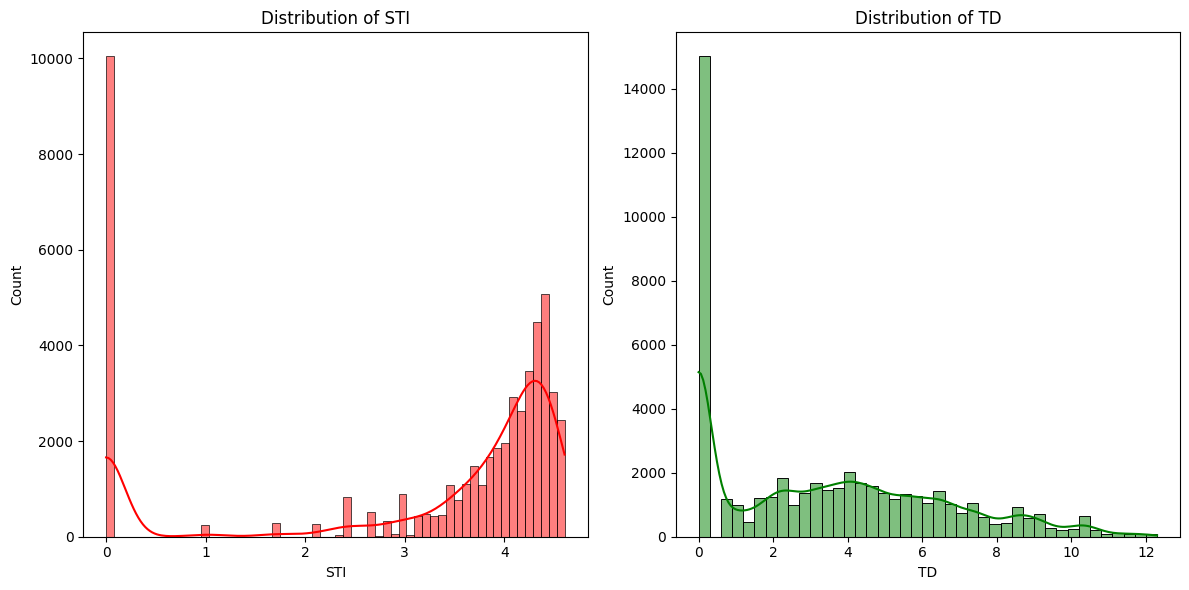

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_excel(r"/content/Covid.xlsx")  # Load your dataset

# Print the columns to identify available data
print("Available columns in the dataset:")
print(df.columns)

# Ensure the columns for plotting are present
# Replace 'deaths' and 'recoveries' with actual column names from the dataset
if 'TD' in df.columns and 'STI' in df.columns:  # Adjust column names based on actual data
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['STI'], kde=True, color='red')
    plt.title('Distribution of STI')

    plt.subplot(1, 2, 2)
    sns.histplot(df['TD'], kde=True, color='green')  # Assuming 'cases' is present instead of 'recoveries'
    plt.title('Distribution of TD')

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'STI' or 'TD' not found in the DataFrame.")


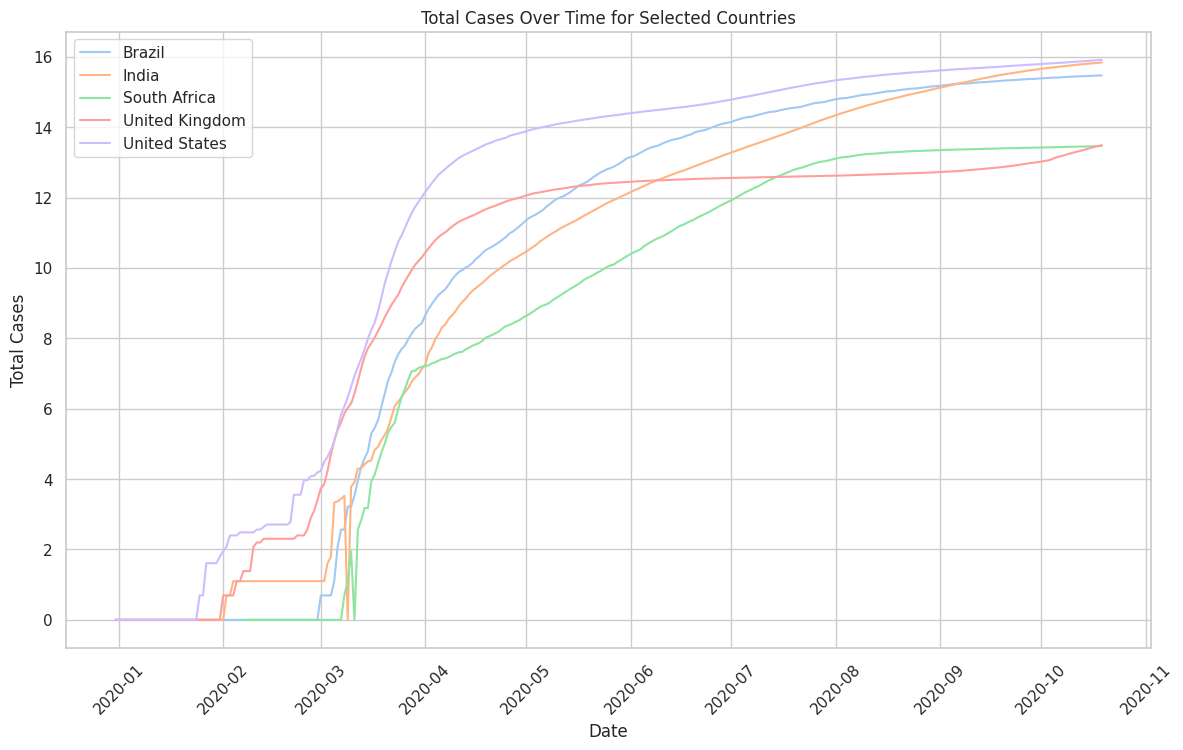

In [24]:
# Convert the 'DATE' column to datetime using pandas
df['DATE'] = pd.to_datetime(df['DATE'])

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# 1. Total Cases and Total Deaths Over Time for Selected Countries
# Select a few countries for a time series analysis
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'South Africa']
covid_selected = df[df['COUNTRY'].isin(countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=covid_selected, x='DATE', y='TC', hue='COUNTRY')
plt.title("Total Cases Over Time for Selected Countries")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


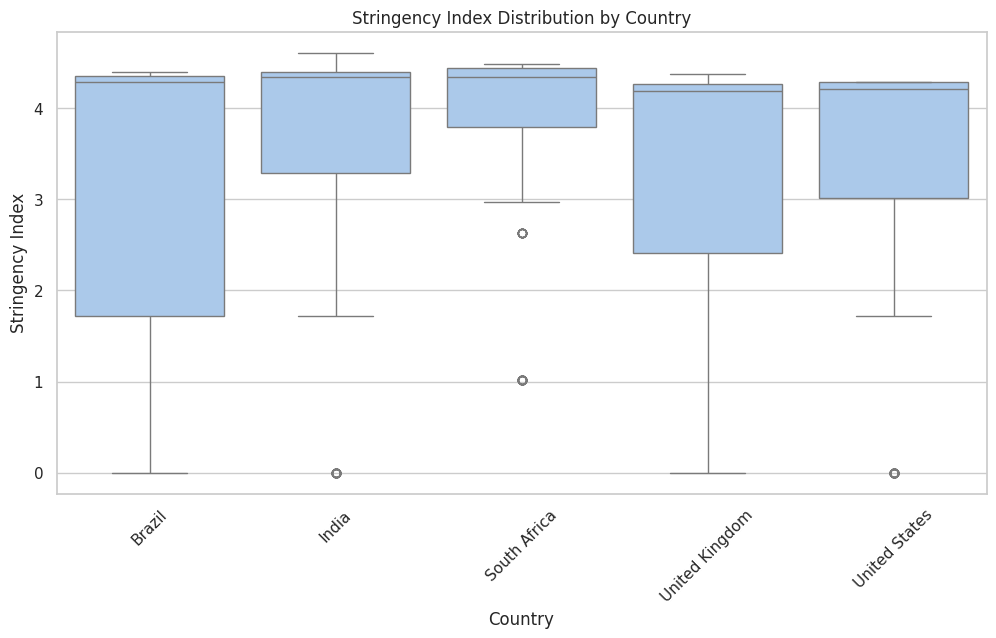

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=covid_selected, x='COUNTRY', y='STI')
plt.title("Stringency Index Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Stringency Index")
plt.xticks(rotation=45)
plt.show()


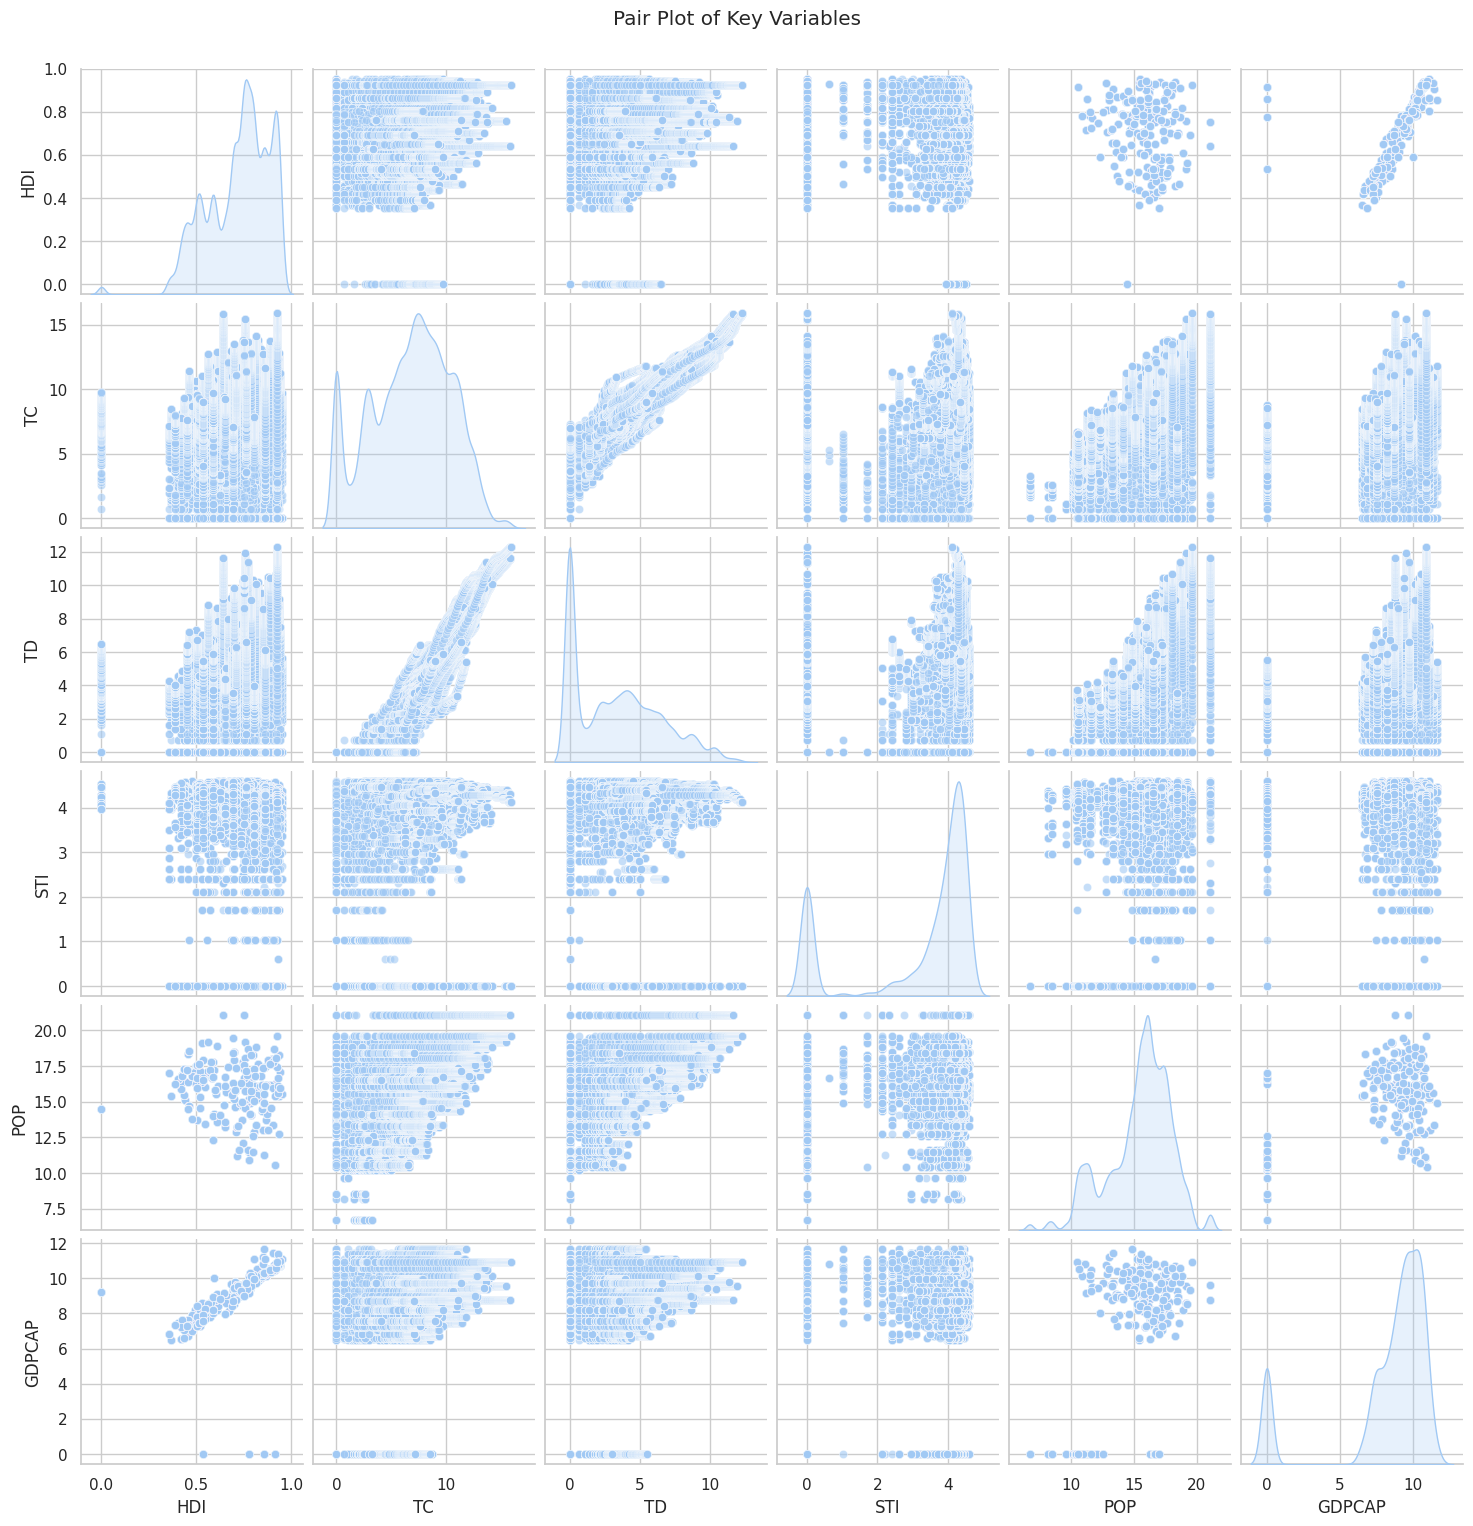

In [27]:
numerical_cols = ['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


In [28]:
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

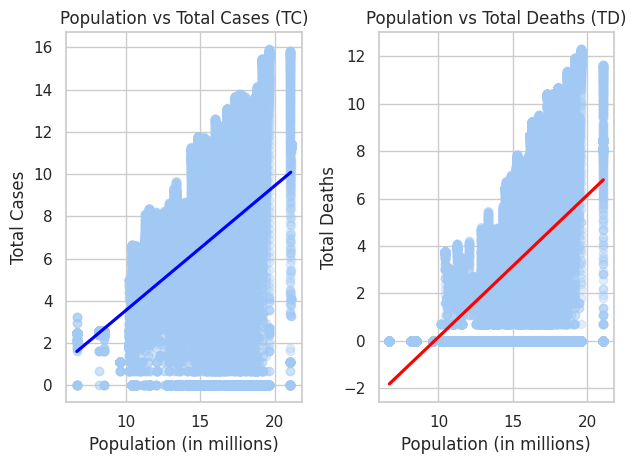

In [31]:
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='POP', y='TC', scatter_kws={'alpha': 0.3}, line_kws={'color': 'blue'})
plt.title("Population vs Total Cases (TC)")
plt.xlabel("Population (in millions)")
plt.ylabel("Total Cases")

# Population vs Total Deaths
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='POP', y='TD', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("Population vs Total Deaths (TD)")
plt.xlabel("Population (in millions)")
plt.ylabel("Total Deaths")

plt.tight_layout()
plt.show()

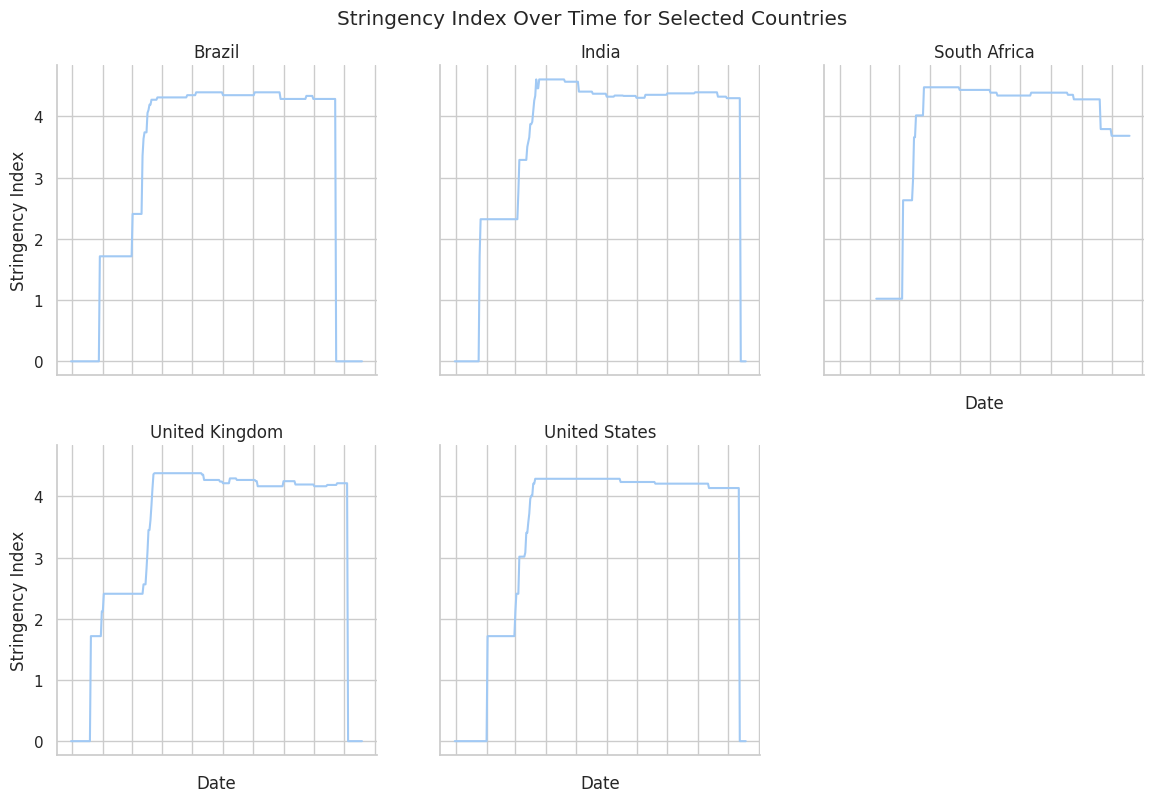

In [32]:
g = sns.FacetGrid(df[df['COUNTRY'].isin(countries)], col="COUNTRY", col_wrap=3, height=4)
g.map(sns.lineplot, 'DATE', 'STI')
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Stringency Index")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Stringency Index Over Time for Selected Countries", y=1.02)
plt.show()


<ipython-input-34-ef1c1b4d250e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




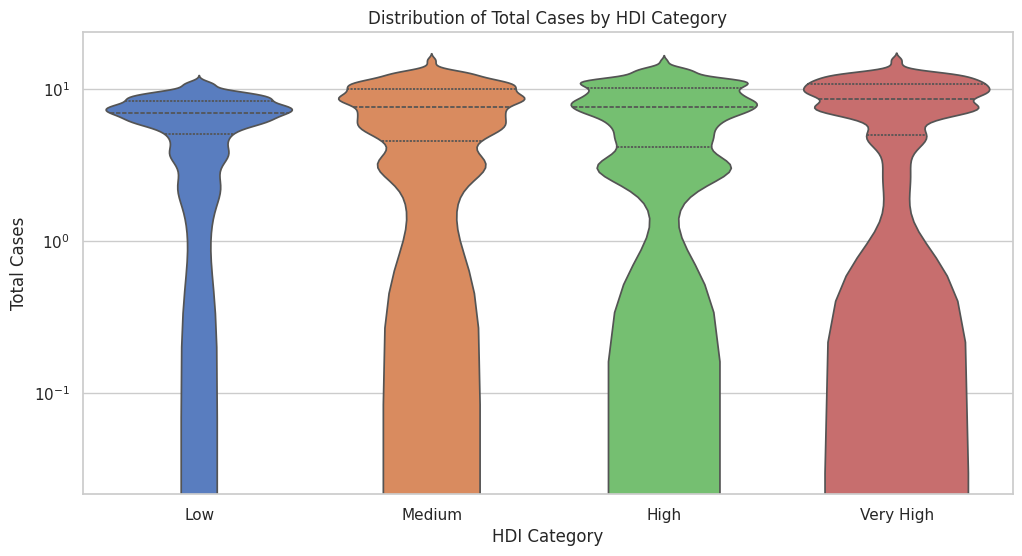

In [34]:
df['HDI_Category'] = pd.cut(df['HDI'], bins=[0, 0.55, 0.7, 0.85, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='HDI_Category', y='TC', palette="muted", inner="quartile")
plt.title("Distribution of Total Cases by HDI Category")
plt.xlabel("HDI Category")
plt.ylabel("Total Cases")
plt.yscale('log')  # Using log scale to handle large range of data
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:315: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:318: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning:

All-NaN slice encountered



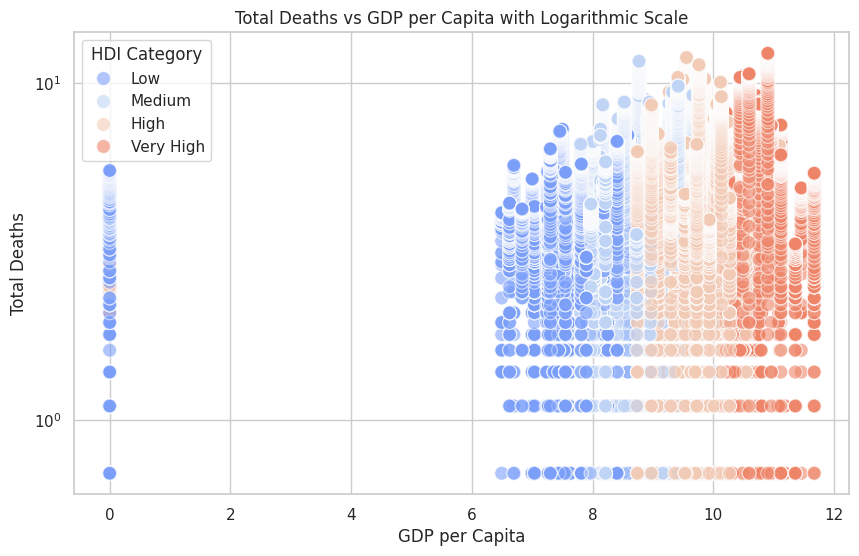

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDPCAP', y='TD', hue='HDI_Category', palette="coolwarm", edgecolor='w', s=100, alpha=0.6)
sns.regplot(data=df, x='GDPCAP', y='TD', scatter=False, color='black', logx=True)
plt.title("Total Deaths vs GDP per Capita with Logarithmic Scale")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.legend(title="HDI Category")
plt.show()